<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/Spyder_Man.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp -r '/content/drive/MyDrive/Movies/data/prepro_data/' '/content/'

In [2]:
!pip install japanize-matplotlib
!apt-get -q -y install swig 
!apt-get install mecab
!apt-get install libmecab-dev
!apt-get install mecab-ipadic-utf8
!pip install mecab-python3
!pip install unidic-lite
#日本語フォントのインストール　（wordcloudなどで可視化するため）
!apt-get -y install fonts-ipafont-gothic

!pip install neologdn 
#半角を全角に変換
!pip install mojimoji

Reading package lists...
Building dependency tree...
Reading state information...
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303

In [3]:
import pandas as pd
import codecs 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import japanize_matplotlib

import warnings

import os
import gc
from tqdm import tqdm

RANDOM_SEED=2020

import warnings
warnings.simplefilter("ignore")

In [37]:
def read_data(dir, encode_type):
  output=pd.DataFrame()
  print(dir)
  files=os.listdir(dir)
  print(files)

  for file_ in files:
    if '2017' or '2018' or '2019' in file_: #収集できているファイル


      path = dir+file_
      print(path)
      with codecs.open(path, "r", encode_type, "ignore") as file:
          d = pd.read_csv(file, delimiter=",")
      
      output = pd.concat([output, d], axis=0)

  return output

In [38]:
data = pd.read_csv('/content/prepro_data/spider-man.csv')

In [39]:
from wordcloud import STOPWORDS, WordCloud

def make_wordcloud(df:pd.DataFrame):
  plt.figure(figsize=(20,20))
  wc = WordCloud(
                 max_words = 500, width = 1600, height = 800,
                 font_path= '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf').generate(" ".join(df["review_tokenize"]))
                 #stopwords = STOPWORDS)\
                 
  plt.imshow(wc, interpolation="bilinear")


In [40]:
def make_wordcloud_Spidy(df:pd.DataFrame, mask:np.ndarray):
  plt.figure(figsize=(20,20))
  wc = WordCloud(mask=mask,
                 max_words = 3000,
                 colormap = 'Reds',
                 font_path= '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf').generate(" ".join(df["review_tokenize2"]))
  plt.xticks(color="None")
  plt.yticks(color="None")
  plt.tick_params(length=0)
  plt.imshow(wc, interpolation="bilinear")

  plt.savefig('./result.png')

In [41]:
"""data["review_tokenize"] = data["review_tokenize"] + ' Spider-Man'
data.sample(frac=0.65).loc[:, "review_tokenize"] + ' ｳｪﾌﾞｼｭｰﾀｰ'
data.sample(frac=0.45).loc[:, "review_tokenize"] + ' ﾏｽｸ'
data.sample(frac=0.5).loc[:, "review_tokenize"] + ' ｽｰﾂ'"""

def add_words(input_df,word,frac):
  df = input_df.copy()
  idx = df.sample(frac=frac).index
  df.loc[idx, 'review_tokenize'] = df.loc[idx, 'review_tokenize']+' '+word

  return df  

In [42]:
data = add_words(data,'ｳｪﾌﾞｼｭｰﾀｰ',0.65)
data = add_words(data,'ﾄﾞﾛｰﾝ',0.5)
data = add_words(data,'ﾏｽｸ',0.25)
data = add_words(data,'ｽｰﾂ',0.5)
data = add_words(data,'ﾈｯﾄﾞ',0.35)

In [43]:
data["review_tokenize"] = data["review_tokenize"] + ' Spider-Man'

In [44]:
data.sample(frac=0.7).loc[:,"review_tokenize"] + ' cool'

258    0 年 ｱｶﾃﾞﾐｰ 賞 長編 ｱﾆﾒ 映画 賞 作品 ｽﾊﾟｲﾀﾞｰﾏﾝ ｱﾆﾒ ｱｶﾃﾞ...
364    予想 展開 面白い ｰｱﾍﾞﾝｼﾞｬｰｽﾞ 見る ｱｲｱﾝﾏﾝ 話 分かる marvel 作...
4      主人 ﾋﾟｰﾀｰ めっちゃくちゃ 可愛い 中学 ｽﾊﾟｲﾀﾞｰﾏﾝ 言う 中 衝撃 存在 今...
124    最初 かっこ 良い ﾊﾝﾄﾞｼｪｲｸ 遣る 成る おば 今 ﾎﾟｯﾂ 出る 来る 最高 ｽｰ...
222    ｽﾊﾟｲﾀﾞｰﾏﾝ ほんと ｲｶ 為る 映画 興奮 為る ｽﾊﾟｲﾃﾞｨｰ 気持ち 分かる ...
                             ...                        
54     0 感じ ｽﾊﾟｲﾀﾞｰﾏﾝ 敵 対する 態度 以外 ﾃﾞｯﾄﾞﾌﾟｰﾙ 気 合う ﾄﾞﾛｰ...
268    圧巻 映像 最高 設定 ｽﾊﾟｲﾀﾞｰﾏﾝﾌｧﾝ 垂涎 映画 ｽﾊﾟｲﾀﾞｰﾏﾝ 作画 それ...
31     作品 於く ｽﾊﾟｲﾀﾞｰﾏﾝ 今 ｽﾊﾟｲﾀﾞｰﾏﾝ 比べる 青臭い ｲﾒｰｼﾞ 有る 言...
42     唐揚げ 弁当 ﾁｷﾝ 南蛮 弁当 迷う 結局 ｶﾂ 食う 感じ ｳｪﾌﾞｼｭｰﾀｰ ﾄﾞﾛｰ...
113    字幕 版 二 次元 鑑賞 為る 最近 marvel 作品 ｼﾘｱｽ 重い 深い 話 多い 比...
Name: review_tokenize, Length: 293, dtype: object

In [45]:
data["review_tokenize"]

0      今回 ﾋﾟｰﾀｰﾊﾟｰｶｰ 親愛 隣人 似合う ｽﾊﾟｲﾀﾞｰﾏﾝ 歴代 一 若い 為 そそ...
1      本作 imax 童貞 卒業 為る imax 三 次元 ﾎｰﾑｶﾐﾝｸﾞ 臨場 感 ﾊﾝﾊﾟ ...
2      ｱﾍﾞﾝｼﾞｬｰｽﾞ ｼﾘｰｽﾞ 見る 人 為る 堪る 思う 見る 人 期待 知れる 過去 ...
3      ｽﾊﾟｲﾀﾞｰﾏﾝ 0 全部 見る 糸 使う 戦う 空中 ｱｸｼｮﾝ 見飽きる 一連 ｼﾘｰ...
4      主人 ﾋﾟｰﾀｰ めっちゃくちゃ 可愛い 中学 ｽﾊﾟｲﾀﾞｰﾏﾝ 言う 中 衝撃 存在 今...
                             ...                        
414    ｺﾒﾃﾞｨ ｹﾞﾗｹﾞﾗ 楽しむ 見る ｼﾞｪｲｸｷﾞﾚﾝﾎｰﾙ 軽妙 良い 一 もったい ...
415    映画 見る 時 思い 有る 過ぎる 涙 涙 今回 楽しい 見る ｽﾊﾟｲﾀﾞｰﾏﾝ 楽しみ ...
416    ｴﾝﾄﾞｹﾞｰﾑ 話 ｺﾒﾃﾞｨ 要素 多い 映画 話 展開 ﾏｰﾍﾞﾙ 映画 感じ 考える...
417    ﾄﾑﾎｰﾗﾝﾄﾞ かっこ 良い 可愛い 完璧 次 ｼｰｽﾞﾝ 待ち遠しい ｳｪﾌﾞｼｭｰﾀｰ...
418     面白い ｽﾀｰｸ 亡くなる こと 因る 喪失 感 大きい ｽｰﾂ ﾈｯﾄﾞ Spider-Man
Name: review_tokenize, Length: 419, dtype: object

In [46]:
data["review_tokenize"] = data["review_tokenize"].apply(lambda x: x.replace('ｽﾊﾟｲﾀﾞｰﾏﾝ', 'Spider-Man').replace('Spider Man','Spider-Man').replace('Spider　Man','Spider-Man'))

In [48]:
#make_wordcloud(data[data['score']>4.0])

In [49]:
#sns.countplot(data.score.replace('-','').astype(float).sort_values())
#plt.xticks(rotation=90)

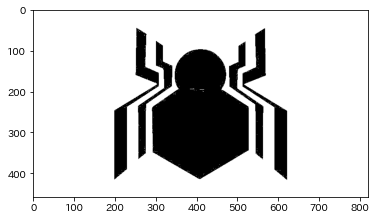

In [50]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('/content/spider-man-symbol.png'))
mask = np.where(mask == 0, 0, 255)
plt.imshow(mask)

In [51]:
data['review_tokenize2'] = data['review_tokenize'].apply(lambda x: x.replace('為る','')\
                                                 .replace('無い','').replace('有る','').replace('居る','').replace('思う','')
                                                 .replace('ところ','').replace('こと','').replace('成る',''))

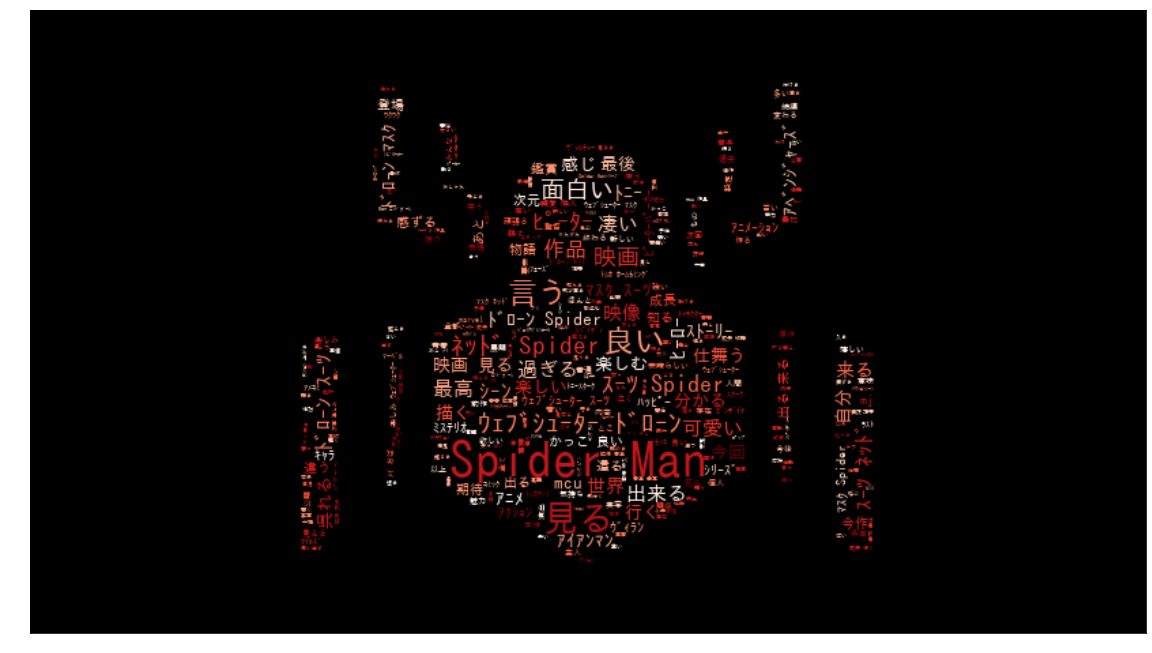

In [52]:
make_wordcloud_Spidy(data[data.score>3.7], mask)

In [53]:
path = '/content/Spider-Man3.png'

mask = np.array(Image.open(path))
mask.shape

(680, 900, 4)

In [54]:
mask = np.where(mask == 0, 0, 255)

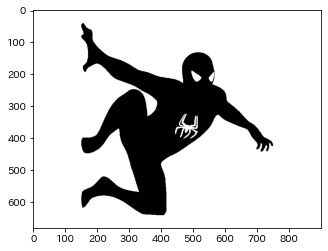

In [55]:
plt.imshow(mask)

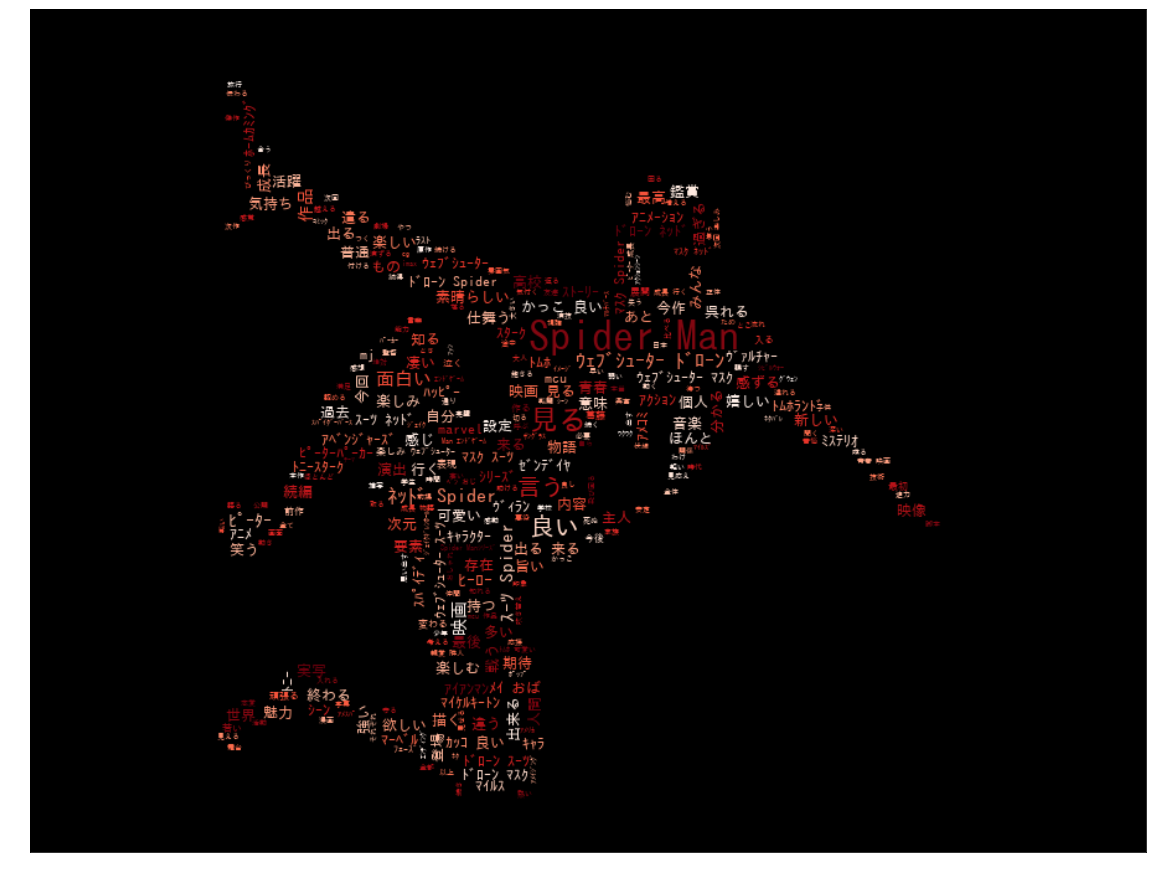

In [56]:
make_wordcloud_Spidy(data, mask)

(355, 335, 3)


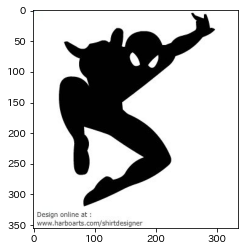

In [65]:
path = '/content/Spidy3.jpg'

mask = np.array(Image.open(path))
print(mask.shape)
plt.imshow(mask)

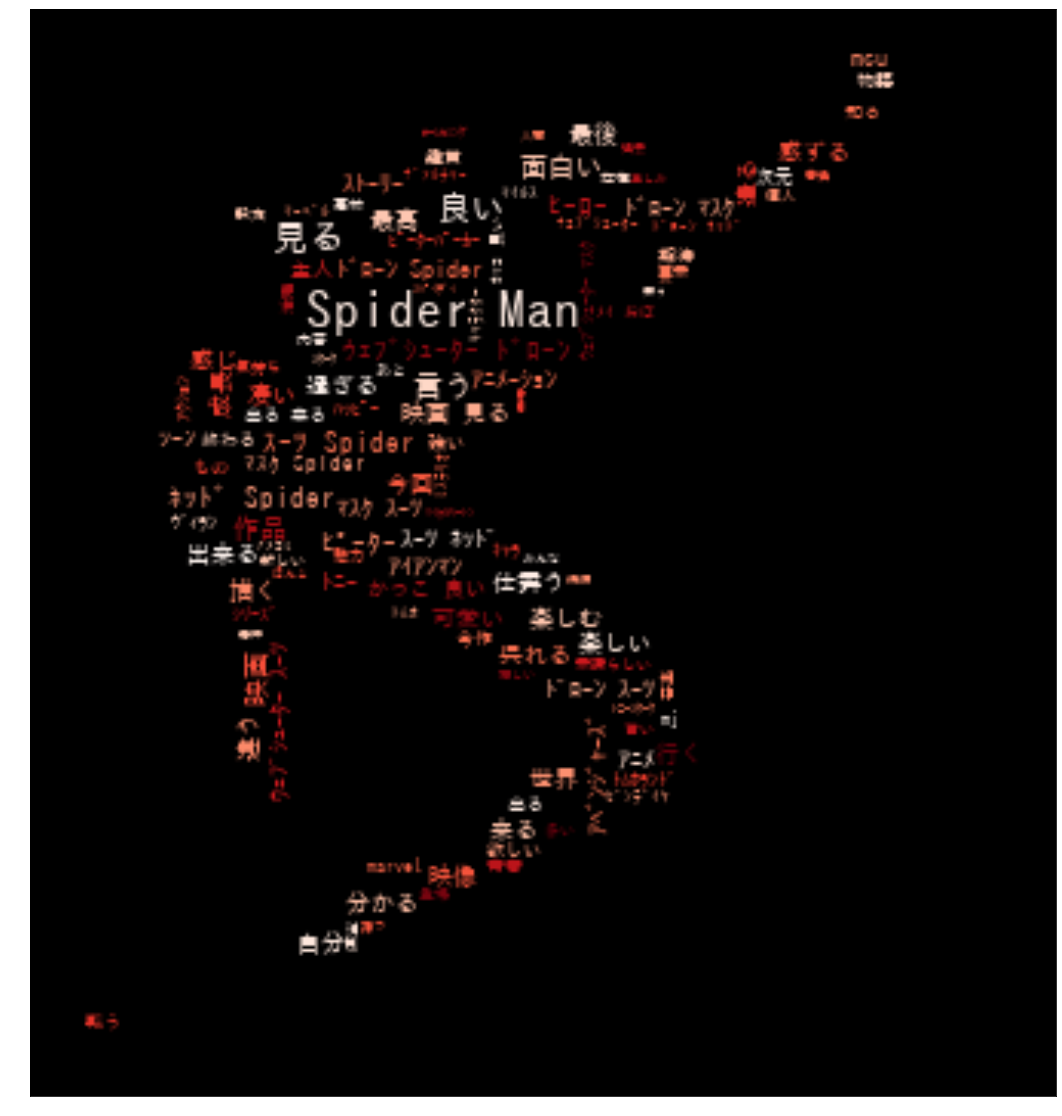

In [66]:
make_wordcloud_Spidy(data, mask)